In [4]:
library(tidyverse)
library(drc)
# https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0146021

**La courbe logistique à quatre paramètres** est une fonction mathématique utilisée pour modéliser la croissance saturante. Elle est caractérisée par quatre paramètres principaux : la valeur minimale (le plancher), la valeur maximale (le plafond), le taux de croissance (k), et la valeur de la variable à mi-parcours (x₀) - le point d'inflexion. L'équation de la courbe logistique à quatre paramètres est donnée par :

$$
f(x) = L + \frac{U - L}{1 + e^{-k(x-x_0)}}
$$

où :


- **$L$** est la valeur minimale (le plancher), *la valeur la plus basse que la variable peut atteindre*.

$$
L = \text{valeur minimale}
$$

- **$U$** est la valeur maximale (le plafond), *la valeur la plus haute que la variable peut atteindre*.

$$
U = \text{valeur maximale}
$$

- **$k$** est le taux de croissance, *le facteur par lequel la variable augmente à chaque période*.

$$
k = \text{taux de croissance}
$$

- **$x_0$** est la valeur de la variable à mi-parcours (le point d'inflexion), *le point où la variable change de direction*.

$$
x_0 = \text{valeur à mi-parcours}
$$

- **$x$** est la variable indépendante, *la variable qui n'est pas influencée par les autres variables*.

$$
x = \text{variable indépendante}
$$



,Estimate,Std. Error
e:1:0.378,0.6610398,0.16187718
e:1:0.238,0.2672931,0.04622201
e:1:0.389,0.7022875,0.17562691
e:1:0.278,0.3594395,0.07007112
e:1:0.418,0.8209925,0.21643642
e:1:0.256,0.3071230,0.05620614
e:1:0.504,1.2861604,0.39036042
e:1:0.473,1.0949790,0.31652990
e:1:0.412,0.7951624,0.20740891
e:1:0.296,0.4054967,0.08288799


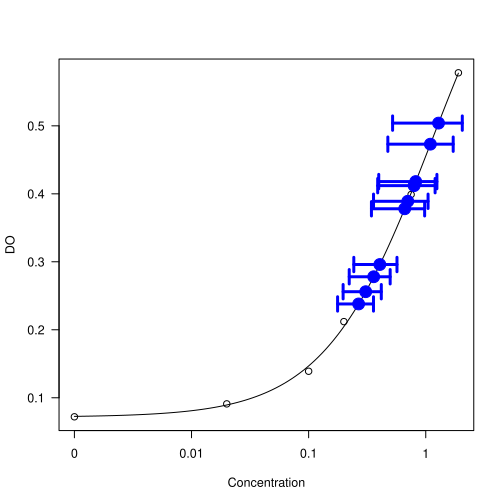

In [5]:
dat <- data.frame(Concentration = c( 0, 0.02, 0.1, 0.2, 0.75, 1.9),
                DO = c(0.072, 0.091, 0.139, 0.212, 0.399, 0.578))

model1 <- drm(DO ~ Concentration,
            fct = LL.4(
              names = c(
                "Slope", "Lower", "Upper", "ED50")),
            data = dat)
plot(model1)

# Voici donc la courbe standard triée. 
# Maintenant, la prochaine étape consiste à prendre quelques échantillons inconnus 
# et à calculer leur couleur ("densité optique") en utilisant l'ELISA, 
# puis à lire cette valeur de DO à partir du graphique :

# Voici les valeurs observées des nouveaux échantillons.

response <- c(0.378, 0.238, 0.389, 0.278, 0.418, 0.256, 0.504, 0.473, 0.412, 0.296)

# Estimez la concentration.

# Et voici les estimations incluant les erreurs standards.
dose_x <- ED(model1, response,
  type = "absolute", display = F
)

# Nous pouvons ajouter ceux-ci à notre graphique.
points(
  y = response, x = dose_x[, 1],
  col = "blue", pch = 19, cex = 2
)

# Avec des barres d'erreur.
arrows(dose_x[, 1], response, dose_x[, 1] +
  dose_x[, 2] * 1.96, response,
length = 0.1,
angle = 90, lwd = 3, col = "blue"
)
arrows(dose_x[, 1], response, dose_x[, 1] -
  dose_x[, 2] * 1.96, response,
length = 0.1,
angle = 90, lwd = 3, col = "blue"
)

dose_x

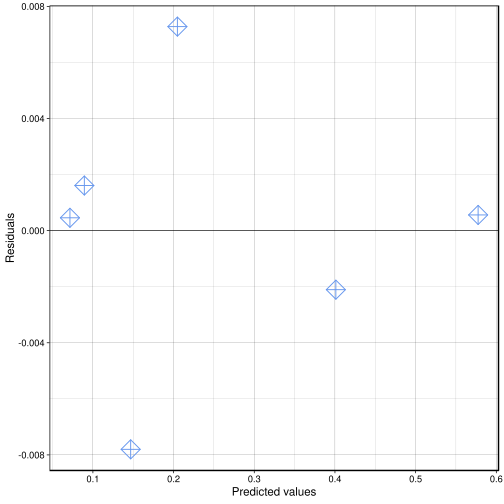

In [6]:
ggplot(as_tibble(model1$predres)) +
  geom_point(aes(`Predicted values`, Residuals),
    pch = 9, size = 6, color = "cornflowerblue") +
  theme_linedraw() + 
  geom_hline(yintercept = 0, lwd = 0.2)